In [194]:
#Import libraries and load test and training data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

df = pd.read_csv("wildfires_training.csv")
test_df = pd.read_csv("wildfires_test.csv")

df.head()
# fire is target column (either yes or no)


,fire,year,temp,humidity,rainfall,drought_code,buildup_index,day,month,wind_speed
0,no,2015,28,59,0.0,8.06,3.47,1,6,19
1,no,2010,30,61,1.3,8.17,4.03,2,6,13
2,no,2009,26,83,13.1,8.08,3.59,3,6,22
3,no,2017,25,87,2.5,7.18,2.42,4,6,15
4,no,2014,28,77,0.0,14.98,4.63,5,6,18


In [195]:
# Convert training and test datato numpy
train_data = df.to_numpy()
test_data = test_df.to_numpy()

# Features (everything except fire) and labels (fire column)
X_train = train_data[:, 1:]
y_train = train_data[:, 0]
X_test = test_data[:, 1:]
y_test = test_data[:, 0]

# feature scaling preprocessing - so large attributes don't overwhelm smaller ones
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [196]:
# Default model where C = 1 & penalty = L2)
log_reg_default = LogisticRegression(max_iter=1000)
log_reg_default.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_def = log_reg_default.predict(X_train_scaled)
y_test_pred_def = log_reg_default.predict(X_test_scaled)

# Accuracy results
train_acc_def = accuracy_score(y_train, y_train_pred_def)
test_acc_def = accuracy_score(y_test, y_test_pred_def)

print("Default Logistic Regression: ")
print("Train Accuracy:", round(train_acc_def, 3))
print("Test Accuracy:", round(test_acc_def, 3))
print("Precision:", round(precision_score(y_test, y_test_pred_def, pos_label='yes'), 3))
print("Recall:", round(recall_score(y_test, y_test_pred_def, pos_label='yes'), 3))


Default Logistic Regression: 
Train Accuracy: 0.896
Test Accuracy: 0.86
Precision: 0.92
Recall: 0.821


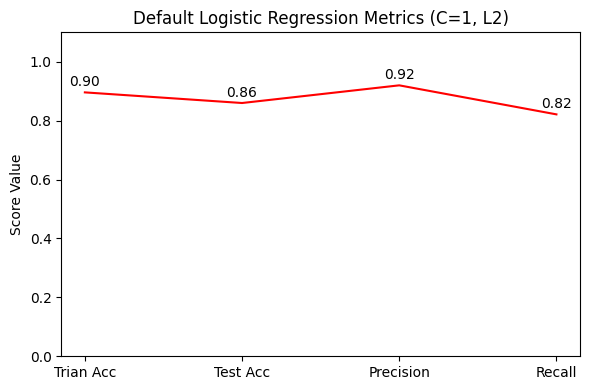

In [197]:
# Defauly Logistic regression plot
metrics = ['Trian Acc', 'Test Acc', 'Precision', 'Recall']
values = [
    train_acc_def,
    test_acc_def,
    precision_score(y_test, y_test_pred_def, pos_label='yes'),
    recall_score(y_test, y_test_pred_def, pos_label='yes')
]

plt.figure(figsize=(6,4))

# Line 
plt.plot(metrics, values, color='red')

# Values at each point
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')

plt.ylim(0, 1.1)
plt.ylabel("Score Value")
plt.title("Default Logistic Regression Metrics (C=1, L2)")
plt.tight_layout()
plt.show()

In [198]:
# Adding hyperparam tuning with different C and penalty values
C_values = [0.01, 0.1, 1, 10, 20, 50]
penalties = ['l1', 'l2']

best_acc = 0
best_C = None
best_penalty = None

# loop through combinations of C and penalty values to find best model
for c in C_values:
    for p in penalties:
            model = LogisticRegression(C=c, penalty=p, solver='liblinear', max_iter=1000)
            model.fit(X_train_scaled, y_train)
            preds = model.predict(X_test_scaled)
            acc = accuracy_score(y_test, preds)
            print(f"C={c}, penalty={p} → Test Accuracy={round(acc,3)}")
            if acc > best_acc:
                best_acc = acc
                best_C = c
                best_penalty = p

# Final most accurate hyperparam values
print("\nMost Accurate hyperparamater values:")
print(f"C Value = {best_C}, Penalty Value = {best_penalty}, Test Accuracy = {round(best_acc,3)}")


C=0.01, penalty=l1 → Test Accuracy=0.44
C=0.01, penalty=l2 → Test Accuracy=0.74
C=0.1, penalty=l1 → Test Accuracy=0.76
C=0.1, penalty=l2 → Test Accuracy=0.78
C=1, penalty=l1 → Test Accuracy=0.86
C=1, penalty=l2 → Test Accuracy=0.86
C=10, penalty=l1 → Test Accuracy=0.88
C=10, penalty=l2 → Test Accuracy=0.86
C=20, penalty=l1 → Test Accuracy=0.88
C=20, penalty=l2 → Test Accuracy=0.88
C=50, penalty=l1 → Test Accuracy=0.88
C=50, penalty=l2 → Test Accuracy=0.88

Most Accurate hyperparamater values:
C Value = 10, Penalty Value = l1, Test Accuracy = 0.88


In [199]:
# Train best model using best hyperparameters found
log_reg_tuned = LogisticRegression(C=best_C, penalty=best_penalty, solver='liblinear', max_iter=1000)
log_reg_tuned.fit(X_train_scaled, y_train)

y_train_pred_tuned = log_reg_tuned.predict(X_train_scaled)
y_test_pred_tuned = log_reg_tuned.predict(X_test_scaled)
# Checking tuned model same as we checked default model
train_acc_tuned = accuracy_score(y_train, y_train_pred_tuned)
test_acc_tuned = accuracy_score(y_test, y_test_pred_tuned)

print("Tuned Logistic Regression:")
print("Train Accuracy:", round(train_acc_tuned, 3))
print("Test Accuracy:", round(test_acc_tuned, 3))
print("Precision:", round(precision_score(y_test, y_test_pred_tuned, pos_label='yes'), 3))
print("Recall:", round(recall_score(y_test, y_test_pred_tuned, pos_label='yes'), 3))

Tuned Logistic Regression:
Train Accuracy: 0.935
Test Accuracy: 0.88
Precision: 0.893
Recall: 0.893


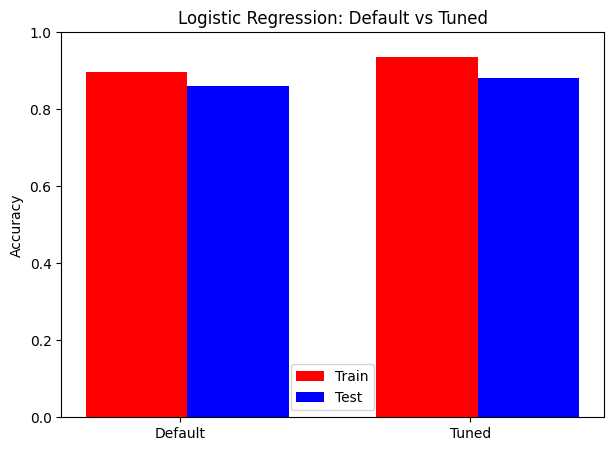

In [200]:
# Plot bar chart comparing default and tuned model accuracies with test and training data
labels = ['Default', 'Tuned']
train_accs = [train_acc_def, train_acc_tuned]
test_accs = [test_acc_def, test_acc_tuned]

plt.figure(figsize=(7,5))
plt.bar([0,1], train_accs, width=0.35, label='Train', color='red')
plt.bar([i+0.35 for i in range(2)], test_accs, width=0.35, label='Test', color='blue')
plt.xticks([i+0.15 for i in range(2)], labels)
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.title("Logistic Regression: Default vs Tuned")
plt.legend()
plt.show()